In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
import seaborn as sns

<Axes: >

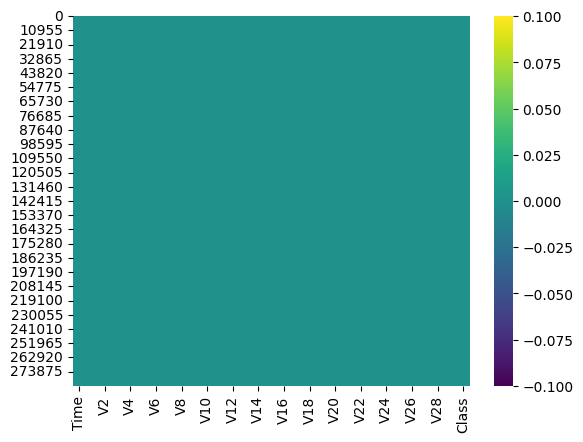

In [6]:
sns.heatmap(data.isnull(), cmap='viridis')

<Axes: ylabel='Class'>

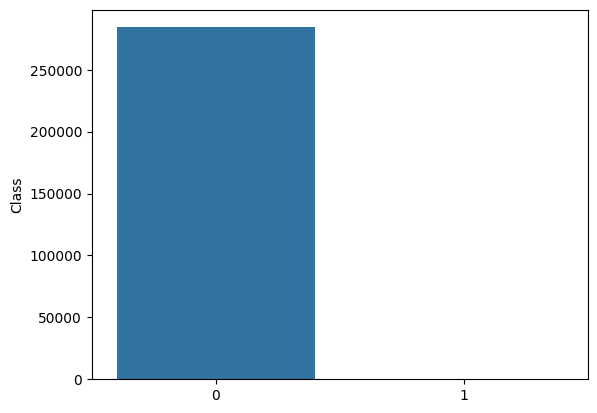

In [9]:
sns.barplot(data['Class'].value_counts())

In [14]:
data['Class'].value_counts()/len(data)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [17]:
legit=data[data.Class==0]

In [18]:
fraud=data[data.Class==1]

In [21]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [22]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [25]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [26]:
# Random Sampling

In [29]:
legit_sample=legit.sample(492)

In [37]:
new_data=pd.concat([legit_sample, fraud], 0)

<ipython-input-37-971d43038aa3>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  new_data=pd.concat([legit_sample, fraud], 0)


In [41]:
new_data.shape

(984, 31)

In [46]:
new_data.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [47]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96481.571138,0.007154,-0.026147,-0.102031,-0.074433,0.032089,-0.122547,0.015983,-0.047181,-0.064157,...,-0.004438,0.003964,-0.028357,0.004639,-0.002987,-0.033800,-0.023413,-0.002834,-0.018762,88.879980
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [53]:
x=new_data.drop(columns=['Class'])

In [51]:
y=new_data.iloc[:,-1]

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=42, test_size=0.2, stratify=y)

In [61]:
print(x_train.shape, x_test.shape,  y_train.shape, y_test.shape)

(787, 30) (197, 30) (787,) (197,)


In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
model=LogisticRegression()

In [64]:
model.fit(x_train, y_train)

LogisticRegression()

In [65]:
from sklearn.metrics import accuracy_score

In [67]:
testing_prediction=model.predict(x_test)

In [68]:
training_prediction=model.predict(x_train)

In [69]:
print('Training Accuracy\n', accuracy_score(training_prediction, y_train))

Training Accuracy
 0.9351969504447268


In [72]:
print('Testing Accuracy\n', accuracy_score(testing_prediction, y_test))

Testing Accuracy
 0.9441624365482234
